In [232]:
import pandas as pd
import statsmodels.api as sm
import re
import numpy as np
import pandas as pd
from itertools import product

In [233]:
def remove_pattern(col_name):
    return re.sub(r'_[0-9]{3}$', '', col_name)

Zones = pd.read_excel('Zones.xlsx')
Dataset = pd.read_csv('KAG 2016-17\Agriculture\Agriculture_KAG_2016_17.csv')
Dataset.columns = map(remove_pattern, Dataset.columns)

param = pd.read_csv('Params/5_Param_Maize_Multicollinearity.csv')

Working_Directory = pd.read_csv('Working_Directory.csv')
Working_Directory = Working_Directory[['District','Maize_Production','TotalNPK', 'SowingSeedsDistributed_Maize',
'LivestockCensus_2012_Cattle', 'AreaUnderCereals_Maize','NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea','Maize_Ratio']].copy()

for x in param.columns:
    if(x != 'SowingSeedsDistributed_Maize' and x != 'AreaUnderCereals_Maize'):
        Working_Directory[x] = Working_Directory[x]*Working_Directory['Maize_Ratio']
        
Working_Directory[24:]

,District,Maize_Production,TotalNPK,SowingSeedsDistributed_Maize,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea,Maize_Ratio
24,BALLARI,104045,8404.154608,2859.005,23446.847903,49869.5,10248.613355,0.136288
25,BIDAR,2791,249.381182,24.550,2371.831678,1382.0,201.341576,0.010114
26,KALABURAGI,14621,710.101614,165.000,6221.617910,2634.0,641.759643,0.013150
27,YADGIRI,2673,368.617469,0.000,1253.317144,961.0,88.878158,0.004033
28,RAICHUR,723,61.547519,14.350,188.537479,2600.0,13.949581,0.000525
29,KOPPAL,190252,10997.550403,5292.000,38936.400172,48210.0,12343.237178,0.149521
30,VIJAYANAGARA,104045,8404.154608,2859.005,23446.847903,49869.5,10248.613355,0.136288


In [234]:
Case_file = pd.read_csv('Params/5_Param_Maize_Multicollinearity.csv')
for x in Case_file.columns:
    Working_Directory[x] = Case_file[x]
y = Working_Directory['Maize_Production']
Case_file[:5]

,SowingSeedsDistributed_Maize,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,TotalNPK,NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea
0,4.45,2567.461578,1129.0,438.180210,175.723235
1,134.73,25037.139271,14867.0,3036.080250,3197.193185
2,260.15,7729.614277,1987.0,222.225258,709.859804
3,5004.00,83821.593093,92194.0,10902.406571,28105.507253
4,6124.60,85657.632091,173400.0,25702.835480,20213.730878


In [235]:
if(len(Case_file) < 31):
    row_24 = Case_file.iloc[24]
    halved_row_24 = row_24 / 2
    Case_file.iloc[24] = halved_row_24
    Case_file.loc[len(Case_file)] = halved_row_24

Case_file[24:]

,SowingSeedsDistributed_Maize,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,TotalNPK,NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea
24,2859.005,23446.847903,49869.5,8404.154608,10248.613355
25,24.550,2371.831678,1382.0,249.381182,201.341576
26,165.000,6221.617910,2634.0,710.101614,641.759643
27,0.000,1253.317144,961.0,368.617469,88.878158
28,14.350,188.537479,2600.0,61.547519,13.949581
29,5292.000,38936.400172,48210.0,10997.550403,12343.237178
30,2859.005,23446.847903,49869.5,8404.154608,10248.613355


In [236]:
Case_file.columns

Index(['SowingSeedsDistributed_Maize', 'LivestockCensus_2012_Cattle',
       'AreaUnderCereals_Maize', 'TotalNPK',
       'NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea'],
      dtype='object')

Q1 (25th percentile): 12535.5
Q3 (75th percentile): 208289.5
Lower bound: -281095.5
Upper bound: 501920.5
IQR: 195754.0


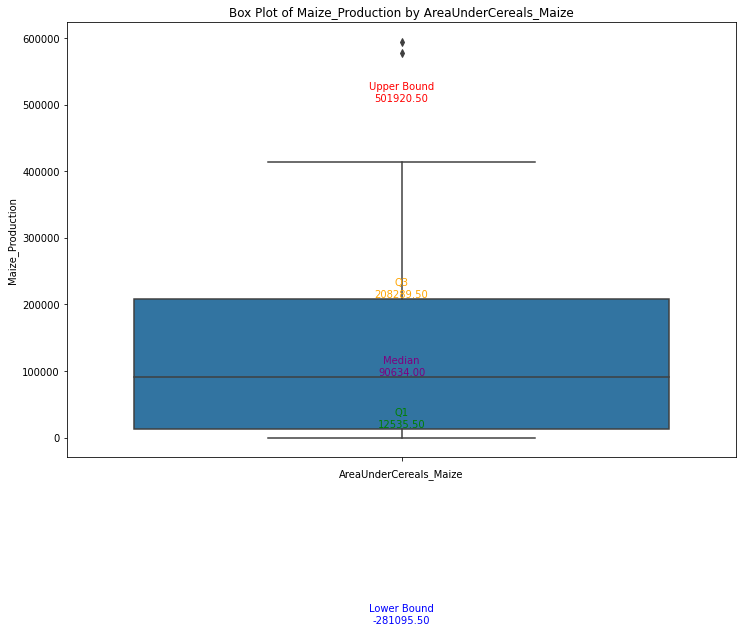

In [237]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Combine Case_file and y DataFrames along columns
df = pd.concat([Case_file, y], axis=1)

# Step 2: Calculate IQR for 'Maize_Production'
Q1 = df['Maize_Production'].quantile(0.25)  # First Quartile (25th percentile)
Q3 = df['Maize_Production'].quantile(0.75)  # Third Quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile Range

# Step 3: Define outliers as values outside the IQR range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Print important points
print("Q1 (25th percentile):", Q1)
print("Q3 (75th percentile):", Q3)
print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)
print("IQR:", IQR)

# Step 4: Flag outliers
df['Outlier'] = (df['Maize_Production'] < lower_bound) | (df['Maize_Production'] > upper_bound)

# Step 5: Calculate median for annotations
median = df['Maize_Production'].median()

# Step 6: Visualize box plot with outliers
plt.figure(figsize=(12, 8))
sns.boxplot( y='Maize_Production', data=df)

# Add labels and title
plt.title('Box Plot of Maize_Production by AreaUnderCereals_Maize')
plt.xlabel('AreaUnderCereals_Maize')
plt.ylabel('Maize_Production')

# Add annotations for important points
plt.text(0, lower_bound, f'Lower Bound\n{lower_bound:.2f}', color='blue', ha='center', va='bottom')
plt.text(0, Q1, f'Q1\n{Q1:.2f}', color='green', ha='center', va='bottom')
plt.text(0, median, f'Median\n{median:.2f}', color='purple', ha='center', va='bottom')
plt.text(0, Q3, f'Q3\n{Q3:.2f}', color='orange', ha='center', va='bottom')
plt.text(0, upper_bound, f'Upper Bound\n{upper_bound:.2f}', color='red', ha='center', va='bottom')

plt.show()


In [238]:
df[df['Outlier']]['Maize_Production']

4     593544
17    576758
Name: Maize_Production, dtype: int64

In [239]:
# Remove outliers from the DataFrame
df_cleaned = df[~df['Outlier']]
df_cleaned.reset_index(drop=True, inplace=True)
df_cleaned.head()

,SowingSeedsDistributed_Maize,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,TotalNPK,NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea,Maize_Production,Outlier
0,4.45,2567.461578,1129.0,438.180210,175.723235,2879,False
1,134.73,25037.139271,14867.0,3036.080250,3197.193185,42583,False
2,260.15,7729.614277,1987.0,222.225258,709.859804,10450,False
3,5004.00,83821.593093,92194.0,10902.406571,28105.507253,271975,False
4,51.50,2278.829821,640.0,220.782906,200.386108,1759,False


Standardizing for all independent variables

In [240]:
Case_file

,SowingSeedsDistributed_Maize,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,TotalNPK,NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea
0,4.450,2567.461578,1129.0,438.180210,175.723235
1,134.730,25037.139271,14867.0,3036.080250,3197.193185
2,260.150,7729.614277,1987.0,222.225258,709.859804
3,5004.000,83821.593093,92194.0,10902.406571,28105.507253
4,6124.600,85657.632091,173400.0,25702.835480,20213.730878
5,51.500,2278.829821,640.0,220.782906,200.386108
6,3538.150,71206.945309,59377.0,8196.896749,14559.991862
7,3814.020,104722.000363,43827.0,10428.246256,5958.813645
8,1639.850,37944.093756,24207.0,2746.313635,10417.677296
9,2923.790,40572.445630,25831.0,8156.290370,3145.789961


In [241]:
import pandas as pd

column = 'SowingSeedsDistributed_Maize'
Q1 = Case_file[column].quantile(0.25)  # First Quartile (25th percentile)
Q3 = Case_file[column].quantile(0.75)  # Third Quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile Range

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_mask = (Case_file[column] < lower_bound) | (Case_file[column] > upper_bound)

outliers = Case_file[outlier_mask][column]
print(f"Outliers in {column}:\n{outliers}\n")

X1_clean = Case_file[~outlier_mask][column].reset_index(drop=True)

Outliers in SowingSeedsDistributed_Maize:
17    11883.58
22    11325.60
Name: SowingSeedsDistributed_Maize, dtype: float64



In [242]:
column = 'LivestockCensus_2012_Cattle'
Q1 = Case_file[column].quantile(0.25)  # First Quartile (25th percentile)
Q3 = Case_file[column].quantile(0.75)  # Third Quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile Range

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outlier_mask = (Case_file[column] < lower_bound) | (Case_file[column] > upper_bound)

outliers = Case_file[outlier_mask][column]
print(f"Outliers in {column}:\n{outliers}\n")

X2_clean = Case_file[~outlier_mask][column].reset_index(drop=True)

Outliers in LivestockCensus_2012_Cattle:
Series([], Name: LivestockCensus_2012_Cattle, dtype: float64)



In [243]:
Case_file.columns

Index(['SowingSeedsDistributed_Maize', 'LivestockCensus_2012_Cattle',
       'AreaUnderCereals_Maize', 'TotalNPK',
       'NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea'],
      dtype='object')

In [244]:
column = 'AreaUnderCereals_Maize'
Q1 = Case_file[column].quantile(0.25)  # First Quartile (25th percentile)
Q3 = Case_file[column].quantile(0.75)  # Third Quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile Range

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outlier_mask = (Case_file[column] < lower_bound) | (Case_file[column] > upper_bound)

outliers = Case_file[outlier_mask][column]
print(f"Outliers in {column}:\n{outliers}\n")

X3_clean = Case_file[~outlier_mask][column].reset_index(drop=True)

Outliers in AreaUnderCereals_Maize:
4     173400.0
17    131163.0
22    170696.0
Name: AreaUnderCereals_Maize, dtype: float64



In [245]:
column = 'TotalNPK'
Q1 = Case_file[column].quantile(0.25)  # First Quartile (25th percentile)
Q3 = Case_file[column].quantile(0.75)  # Third Quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile Range

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outlier_mask = (Case_file[column] < lower_bound) | (Case_file[column] > upper_bound)

outliers = Case_file[outlier_mask][column]
print(f"Outliers in {column}:\n{outliers}\n")

X4_clean = Case_file[~outlier_mask][column].reset_index(drop=True)

Outliers in TotalNPK:
4     25702.835480
17    48288.815127
Name: TotalNPK, dtype: float64



In [246]:
column = 'NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea'
Q1 = Case_file[column].quantile(0.25)  # First Quartile (25th percentile)
Q3 = Case_file[column].quantile(0.75)  # Third Quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile Range

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outlier_mask = (Case_file[column] < lower_bound) | (Case_file[column] > upper_bound)

outliers = Case_file[outlier_mask][column]
print(f"Outliers in {column}:\n{outliers}\n")

X5_clean = Case_file[~outlier_mask][column].reset_index(drop=True)

Outliers in NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea:
17    37481.297967
Name: NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea, dtype: float64



In [247]:
def remove_outliers_from_column(df, column):
    Q1 = df[column].quantile(0.25)  # First Quartile (25th percentile)
    Q3 = df[column].quantile(0.75)  # Third Quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile Range

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Create a mask for outliers
    outlier_mask = (df[column] < lower_bound) | (df[column] > upper_bound)

    # Print outliers for the current column
    outliers = df[outlier_mask][column]
    print(f"Outliers in {column}:\n{outliers}\n")

    # Return Series without outliers
    return df[~outlier_mask][column].reset_index(drop=True)

X5_clean = remove_outliers_from_column(Case_file, 'NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea')
X5_clean.head()

Outliers in NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea:
17    37481.297967
Name: NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea, dtype: float64



0      175.723235
1     3197.193185
2      709.859804
3    28105.507253
4    20213.730878
Name: NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea, dtype: float64

In [248]:
X1_mean = X1_clean.mean()
X1_std = X1_clean.std()
X1_median = X1_clean.median()

X2_mean = X2_clean.mean()
X2_std = X2_clean.std()
X2_median = X2_clean.median()

X3_mean = X3_clean.mean()
X3_std = X3_clean.std()
X3_median = X3_clean.median()

X4_mean = X4_clean.mean()
X4_std = X4_clean.std()
X4_median = X4_clean.median()

X5_mean = X5_clean.mean()
X5_std = X5_clean.std()
X5_median = X5_clean.median()

print(f'X1: Mean = {X1_mean}, Std = {X1_std}, Median = {X1_median}')
print(f'X2: Mean = {X2_mean}, Std = {X2_std}, Median = {X2_median}')
print(f'X3: Mean = {X3_mean}, Std = {X3_std}, Median = {X3_median}')
print(f'X4: Mean = {X4_mean}, Std = {X4_std}, Median = {X4_median}')
print(f'X5: Mean = {X5_mean}, Std = {X5_std}, Median = {X5_median}')

In [249]:
import pandas as pd

# Assuming Case_file is your DataFrame and you've already calculated the means and standard deviations
Case_file_stan = pd.DataFrame()

Case_file_stan['SowingSeedsDistributed_Maize'] = (Case_file['SowingSeedsDistributed_Maize'] - X1_mean) / X1_std
Case_file_stan['LivestockCensus_2012_Cattle'] = (Case_file['LivestockCensus_2012_Cattle'] - X2_mean) / X2_std
Case_file_stan['AreaUnderCereals_Maize'] = (Case_file['AreaUnderCereals_Maize'] - X3_mean) / X3_std
Case_file_stan['TotalNPK'] = (Case_file['TotalNPK'] - X4_mean) / X4_std
Case_file_stan['NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea'] = (Case_file['NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea'] - X5_mean) / X5_std
Case_file_stan

,SowingSeedsDistributed_Maize,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,TotalNPK,NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea
0,-0.954112,-0.923517,-0.969564,-0.894300,-0.824518
1,-0.898299,-0.411298,-0.440831,-0.486547,-0.493762
2,-0.844569,-0.805840,-0.936542,-0.928196,-0.766046
3,1.187731,0.928753,2.535248,0.748113,2.232911
4,1.667804,0.970607,5.660616,3.071116,1.369011
5,-0.933956,-0.930096,-0.988384,-0.928422,-0.821818
6,0.559750,0.641189,1.272222,0.323470,0.750105
7,0.677935,1.405199,0.673751,0.673691,-0.191452
8,-0.253495,-0.117071,-0.081363,-0.532027,0.296653
9,0.296554,-0.057155,-0.018860,0.317096,-0.499389


Calculating delta over dependent variable

In [250]:
y = Working_Directory['Maize_Production']

Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

y_cleaned = y[(y >= lower_bound) & (y <= upper_bound)].reset_index(drop=True)

outliers = y[(y < lower_bound) | (y > upper_bound)]
print(outliers)

y_cleaned.head()

4     593544
17    576758
Name: Maize_Production, dtype: int64


0      2879
1     42583
2     10450
3    271975
4      1759
Name: Maize_Production, dtype: int64

In [251]:
mean_y = y_cleaned.mean()
std_y = y_cleaned.std()
median_y = y_cleaned.median()

print(f'Mean: {mean_y}')
print(f'Standard Deviation: {std_y}')

Mean: 103798.10344827586
Standard Deviation: 113172.42594672735


In [252]:
y_dev = y - mean_y 

mean_y_dev = y_dev.mean()
std_y_dev = y_dev.std()

print(f'Mean: {mean_y_dev}')
print(f'Standard Deviation: {std_y_dev}')

Mean: 31055.025583982213
Standard Deviation: 162508.37904053685


In [253]:
y_dev_st = (y_dev - mean_y_dev )/std_y_dev
y_dev_st

0    -0.812107
1    -0.567787
2    -0.765518
3     0.843783
4     2.822568
5    -0.818999
6    -0.180681
7     0.564149
8    -0.418348
9    -0.452285
10   -0.829823
11   -0.829152
12    1.225068
13   -0.719545
14   -0.710524
15    0.014158
16    0.080198
17    2.719274
18    0.562887
19    0.719014
20   -0.272104
21    0.022293
22    1.714582
23   -0.681596
24   -0.189579
25   -0.812648
26   -0.739852
27   -0.813374
28   -0.825374
29    0.340899
30   -0.189579
Name: Maize_Production, dtype: float64

In [254]:
delta = y_dev_st.mean()
delta

4.3871716295671506e-17

In [255]:
y_dev_st.median()

-0.27210368655038913

Standardizing dependent Variable

In [256]:
y_st = (y - mean_y)/std_y
y_st.head()

0   -0.891729
1   -0.540901
2   -0.824831
3    1.486024
4    4.327431
Name: Maize_Production, dtype: float64

In [257]:
# Ensure that the index of y and Case_file are aligned
y = y.loc[Case_file.index]

# # Identify rows in Case_file that have any zeros
# rows_to_remove = (Case_file == 0).any(axis=1)

# # Identify rows where 'Maize_Production' is less than 500
# rows_to_remove |= Working_Directory['Maize_Production'] < 500

# # Apply the mask to both DataFrames
# Case_file = Case_file[~rows_to_remove].reset_index(drop=True)
# y = y[~rows_to_remove].reset_index(drop=True)

# Correct way to get the length of Case_file
case_file_length = len(Case_file)
case_file_length

31

In [258]:
Case_file_stan =sm.add_constant(Case_file_stan)
Case_file_stan.head()

,const,SowingSeedsDistributed_Maize,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,TotalNPK,NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea
0,1.0,-0.954112,-0.923517,-0.969564,-0.894300,-0.824518
1,1.0,-0.898299,-0.411298,-0.440831,-0.486547,-0.493762
2,1.0,-0.844569,-0.805840,-0.936542,-0.928196,-0.766046
3,1.0,1.187731,0.928753,2.535248,0.748113,2.232911
4,1.0,1.667804,0.970607,5.660616,3.071116,1.369011


In [259]:
Case_file =sm.add_constant(Case_file)
Case_file.head()

,const,SowingSeedsDistributed_Maize,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,TotalNPK,NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea
0,1.0,4.45,2567.461578,1129.0,438.180210,175.723235
1,1.0,134.73,25037.139271,14867.0,3036.080250,3197.193185
2,1.0,260.15,7729.614277,1987.0,222.225258,709.859804
3,1.0,5004.00,83821.593093,92194.0,10902.406571,28105.507253
4,1.0,6124.60,85657.632091,173400.0,25702.835480,20213.730878


In [260]:
Case_file_1 = Case_file[['const','NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea','AreaUnderCereals_Maize','TotalNPK']].copy()

In [261]:
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler

# columns_to_standardize = ['LivestockCensus_2012_Cattle','AreaUnderCereals_Maize','TotalNPK']

# Case_file_1 = Case_file[['const'] + columns_to_standardize].copy()
# scaler = StandardScaler()

# X_st = pd.DataFrame()
# X_st['const'] = Case_file['const']
# # X_st[columns_to_standardize] = scaler.fit_transform(Case_file_1[columns_to_standardize])
# X_st[columns_to_standardize] = Case_file_1[columns_to_standardize]

# Target = 0.05
# y_st = pd.DataFrame()
# y_st['Maize_Production'] = Working_Directory[~rows_to_remove]['Maize_Production'].reset_index(drop=True)
# # y_st['Target_Production'] = (1+Target)*y_st['Maize_Production']
# # columns_to_standardize = ['Maize_Production','Target_Production']

# columns_to_standardize = ['Maize_Production']
# # y_st[columns_to_standardize] = scaler.fit_transform(y_st[columns_to_standardize])
# # columns_to_standardize = ['GroundNut Production','Target Production']
# y_st.head()

In [262]:
# # Get the row with the maximum value in 'Groundnut_Production'
# max_row = Working_Directory[~rows_to_remove][Working_Directory[~rows_to_remove]['Maize_Production'] == Working_Directory[~rows_to_remove]['Maize_Production'].max()]

# # Get the row with the minimum value in 'Groundnut_Production'
# min_row = Working_Directory[~rows_to_remove][Working_Directory[~rows_to_remove]['Maize_Production'] == Working_Directory[~rows_to_remove]['Maize_Production'].min()]

# # Print the rows
# print("Row with maximum Maize_Production:\n", max_row)
# print("\nRow with minimum Maize_Production:\n", min_row)


In [263]:
# model=sm.OLS(y,Case_file_1).fit()
# print(model.summary())
# model.params.values
# coef=model.params.values[1:]
# coef

model=sm.OLS(y_st,Case_file_stan).fit()
Case_file = Case_file_stan
print(model.summary())
model.params.values
coef=model.params.values[1:]
coef

                            OLS Regression Results                            
Dep. Variable:       Maize_Production   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     122.3
Date:                Fri, 20 Sep 2024   Prob (F-statistic):           9.66e-17
Time:                        12:28:44   Log-Likelihood:                -4.5163
No. Observations:                  31   AIC:                             21.03
Df Residuals:                      25   BIC:                             29.64
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

array([-0.21387962,  0.31263851,  0.46564096,  0.39030154,  0.00329052])

In [264]:
Case_file.drop('const',axis=1,inplace=True)
Case_file[:5]

,SowingSeedsDistributed_Maize,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,TotalNPK,NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea
0,-0.954112,-0.923517,-0.969564,-0.894300,-0.824518
1,-0.898299,-0.411298,-0.440831,-0.486547,-0.493762
2,-0.844569,-0.805840,-0.936542,-0.928196,-0.766046
3,1.187731,0.928753,2.535248,0.748113,2.232911
4,1.667804,0.970607,5.660616,3.071116,1.369011


In [272]:
Case_file.loc[:,'Beta_0'] = model.params.values[0]
Case_file.loc[:,'Beta_1'] = coef[0]
Case_file.loc[:,'Beta_2'] = coef[1]
Case_file.loc[:,'Beta_3'] = coef[2]
Case_file.loc[:,'Beta_4'] = coef[3]
Case_file.loc[:,'Beta_5'] = coef[4]

intervals = np.arange(0, 1.1, 0.1)
columns=['Sensitivity_SowingSeedsDistributed_Maize', 'Sensitivity_LivestockCensus_2012_Cattle' , 'Sensitivity_AreaUnderCereals_Maize', 'Sensitivity_TotalNPK','Sensitivity_NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea']

# columns=['Sensitivity_LivestockCensus_2012_Cattle' , 'Sensitivity_AreaUnderCereals_Maize', 'Sensitivity_TotalNPK']
# Generate all possible combinations of elements in arr

num = len(columns)
combinations = product(intervals, repeat=len(columns))
combinations

In [273]:
alpha_df = pd.DataFrame(combinations, columns=columns)
alpha_df

,Sensitivity_SowingSeedsDistributed_Maize,Sensitivity_LivestockCensus_2012_Cattle,Sensitivity_AreaUnderCereals_Maize,Sensitivity_TotalNPK,Sensitivity_NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.1
2,0.0,0.0,0.0,0.0,0.2
3,0.0,0.0,0.0,0.0,0.3
4,0.0,0.0,0.0,0.0,0.4
...,...,...,...,...,...
161046,1.0,1.0,1.0,1.0,0.6
161047,1.0,1.0,1.0,1.0,0.7
161048,1.0,1.0,1.0,1.0,0.8
161049,1.0,1.0,1.0,1.0,0.9


In [274]:
Case_file['key'] = 1
alpha_df['key'] = 1

# Performing the Cartesian product
result_df = pd.merge( alpha_df, Case_file, on='key').drop('key', axis=1)

print(result_df)

         Sensitivity_SowingSeedsDistributed_Maize  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   
...                                           ...   
4992576                                       1.0   
4992577                                       1.0   
4992578                                       1.0   
4992579                                       1.0   
4992580                                       1.0   

         Sensitivity_LivestockCensus_2012_Cattle  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   
...                                          ...   

In [275]:
result_df.head()

,Sensitivity_SowingSeedsDistributed_Maize,Sensitivity_LivestockCensus_2012_Cattle,Sensitivity_AreaUnderCereals_Maize,Sensitivity_TotalNPK,Sensitivity_NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea,SowingSeedsDistributed_Maize,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,TotalNPK,NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea,Beta_0,Beta_1,Beta_2,Beta_3,Beta_4,Beta_5
0,0.0,0.0,0.0,0.0,0.0,-0.954112,-0.923517,-0.969564,-0.894300,-0.824518,-0.021597,-0.21388,0.312639,0.465641,0.390302,0.003291
1,0.0,0.0,0.0,0.0,0.0,-0.898299,-0.411298,-0.440831,-0.486547,-0.493762,-0.021597,-0.21388,0.312639,0.465641,0.390302,0.003291
2,0.0,0.0,0.0,0.0,0.0,-0.844569,-0.805840,-0.936542,-0.928196,-0.766046,-0.021597,-0.21388,0.312639,0.465641,0.390302,0.003291
3,0.0,0.0,0.0,0.0,0.0,1.187731,0.928753,2.535248,0.748113,2.232911,-0.021597,-0.21388,0.312639,0.465641,0.390302,0.003291
4,0.0,0.0,0.0,0.0,0.0,1.667804,0.970607,5.660616,3.071116,1.369011,-0.021597,-0.21388,0.312639,0.465641,0.390302,0.003291


In [276]:
Working_Directory['Maize_Production'].mean()

134853.12903225806

In [277]:
Working_Directory.columns

Index(['District', 'Maize_Production', 'TotalNPK',
       'SowingSeedsDistributed_Maize', 'LivestockCensus_2012_Cattle',
       'AreaUnderCereals_Maize',
       'NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea',
       'Maize_Ratio'],
      dtype='object')

In [278]:
# delta_O = 0.05*(y_st['Maize_Production'].median())
# delta_O

In [279]:
# delta_O = 5000

result_df['New_F1'] = result_df['SowingSeedsDistributed_Maize'] + (result_df['Sensitivity_SowingSeedsDistributed_Maize']*delta)/result_df['Beta_1']
result_df['New_F2'] = result_df['LivestockCensus_2012_Cattle'] + (result_df['Sensitivity_LivestockCensus_2012_Cattle']*delta)/result_df['Beta_2']
result_df['New_F3'] = result_df['AreaUnderCereals_Maize'] + (result_df['Sensitivity_AreaUnderCereals_Maize']*delta)/result_df['Beta_3']
result_df['New_F4'] = result_df['TotalNPK'] + (result_df['Sensitivity_TotalNPK']*delta)/result_df['Beta_4']
result_df['New_F5'] = result_df['NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea'] + (result_df['Sensitivity_NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea']*delta)/result_df['Beta_5']
result_df['District'] = np.tile(Working_Directory['District'],11**num)

# result_df['New_F1'] = result_df['New_F1'].apply(lambda x: max(0, x))
# result_df['New_F2'] = result_df['New_F2'].apply(lambda x: max(0, x))
# result_df['New_F3'] = result_df['New_F3'].apply(lambda x: max(0, x))
# result_df['New_F4'] = result_df['New_F4'].apply(lambda x: max(0, x))
# result_df['New_F5'] = result_df['New_F5'].apply(lambda x: max(0, x))



In [281]:
result_df['New_Production'] = result_df['Beta_1'] * result_df['New_F1'] + result_df['Beta_2'] * result_df['New_F2'] + result_df['Beta_3'] * result_df['New_F3'] + result_df['Beta_4'] * result_df['New_F4']  + result_df['Beta_5'] * result_df['New_F5'] + result_df['Beta_0']
result_df

,Sensitivity_SowingSeedsDistributed_Maize,Sensitivity_LivestockCensus_2012_Cattle,Sensitivity_AreaUnderCereals_Maize,Sensitivity_TotalNPK,Sensitivity_NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea,SowingSeedsDistributed_Maize,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,TotalNPK,NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea,...,Beta_3,Beta_4,Beta_5,New_F1,New_F2,New_F3,New_F4,New_F5,District,New_Production
0,0.0,0.0,0.0,0.0,0.0,-0.954112,-0.923517,-0.969564,-0.894300,-0.824518,...,0.465641,0.390302,0.003291,-0.954112,-0.923517,-0.969564,-0.894300,-0.824518,BENGALURU,-0.909488
1,0.0,0.0,0.0,0.0,0.0,-0.898299,-0.411298,-0.440831,-0.486547,-0.493762,...,0.465641,0.390302,0.003291,-0.898299,-0.411298,-0.440831,-0.486547,-0.493762,BENGALURU(R),-0.354850
2,0.0,0.0,0.0,0.0,0.0,-0.844569,-0.805840,-0.936542,-0.928196,-0.766046,...,0.465641,0.390302,0.003291,-0.844569,-0.805840,-0.936542,-0.928196,-0.766046,RAMANAGARA,-0.893787
3,0.0,0.0,0.0,0.0,0.0,1.187731,0.928753,2.535248,0.748113,2.232911,...,0.465641,0.390302,0.003291,1.187731,0.928753,2.535248,0.748113,2.232911,CHITRADURGA,1.494587
4,0.0,0.0,0.0,0.0,0.0,1.667804,0.970607,5.660616,3.071116,1.369011,...,0.465641,0.390302,0.003291,1.667804,0.970607,5.660616,3.071116,1.369011,DAVANAGERE,3.764124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992576,1.0,1.0,1.0,1.0,1.0,-0.885332,-0.840216,-0.911641,-0.851621,-0.773501,...,0.465641,0.390302,0.003291,-0.885332,-0.840216,-0.911641,-0.851621,-0.773501,KALABURAGI,-0.854359
4992577,1.0,1.0,1.0,1.0,1.0,-0.956019,-0.953474,-0.976030,-0.905219,-0.834024,...,0.465641,0.390302,0.003291,-0.956019,-0.953474,-0.976030,-0.905219,-0.834024,YADGIRI,-0.925749
4992578,1.0,1.0,1.0,1.0,1.0,-0.949871,-0.977746,-0.912950,-0.953415,-0.842227,...,0.465641,0.390302,0.003291,-0.949871,-0.977746,-0.912950,-0.953415,-0.842227,RAICHUR,-0.924118
4992579,1.0,1.0,1.0,1.0,1.0,1.311112,-0.094450,0.842439,0.763047,0.507441,...,0.465641,0.390302,0.003291,1.311112,-0.094450,0.842439,0.763047,0.507441,KOPPAL,0.360216


In [282]:
def normalize_list(lst):
    min_val = min(lst)
    max_val = max(lst)
    normalized_lst = [(x - min_val) / (max_val - min_val) for x in lst]
    return normalized_lst

In [283]:
import pandas as pd
import numpy as np

adjacency_excel = pd.read_excel('Karnataka_District_Adjacency_File.xlsx')

district_codes = sorted(set(adjacency_excel['District_Code']))

n = len(district_codes)
adj_matrix = np.zeros((n, n), dtype=int)

code_to_index = {code: idx for idx, code in enumerate(district_codes)}

for i in range(len(adjacency_excel)):
    district_code = adjacency_excel['District_Code'][i]
    neighbors = [int(num) for num in str(adjacency_excel['District_Neighbors'][i]).split(',') if num.strip().isdigit()]
    
    for neighbor in neighbors:
        adj_matrix[code_to_index[district_code]][code_to_index[neighbor]] = 1
        adj_matrix[code_to_index[neighbor]][code_to_index[district_code]] = 1  # Assuming adjacency is bidirectional

adj_matrix_df = pd.DataFrame(adj_matrix, index=district_codes, columns=district_codes)

print(adj_matrix_df)

adj_matrix_np = adj_matrix_df.to_numpy()

    1   2   3   4   5   6   7   8   9   10  ...  22  23  24  25  26  27  28  \
1    0   1   1   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
2    1   0   1   0   0   1   1   0   1   0  ...   0   0   0   0   0   0   0   
3    1   1   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
4    0   0   0   0   1   0   0   0   1   1  ...   0   0   0   1   0   0   0   
5    0   0   0   1   0   0   0   1   0   1  ...   0   1   0   1   0   0   0   
6    0   1   0   0   0   0   1   0   0   0  ...   0   0   0   0   0   0   0   
7    0   1   0   0   0   1   0   0   1   0  ...   0   0   0   0   0   0   0   
8    0   0   0   0   1   0   0   0   0   1  ...   0   1   1   0   0   0   0   
9    0   1   1   1   0   0   1   0   0   1  ...   0   0   0   0   0   0   0   
10   0   0   0   1   1   0   0   1   1   0  ...   0   0   0   0   0   0   0   
11   0   0   0   0   0   0   0   0   0   1  ...   0   0   0   0   0   0   0   
12   0   0   0   0   0   0   0   1   0   1  ...   0 

In [285]:
def calculate_avg_capability(capability, neighbors):
    num_neighbors = len(neighbors)
    if num_neighbors == 0:
        return 0
    sum_capabilities = sum(capability[n] for n in neighbors)
    return sum_capabilities / num_neighbors

def calculate_stress_stability(capability, adjacency_matrix):
    n = len(capability)
    stress = np.zeros(n)
    stability = np.zeros(n)
    
    for i in range(n):
        neighbors = [j for j in range(n) if adjacency_matrix[i][j] == 1 and i != j]
        if len(neighbors) > 0:
            avg_capability = calculate_avg_capability(capability, neighbors)
            stress[i] = abs(avg_capability - capability[i])
            stability[i] = 1 - stress[i]
        else:
            stress[i] = 0  # If no neighbors, stress is zero
            stability[i] = 1
        
    return stress, stability

In [286]:
stress_values_list = []
stability_values_list = []

# Define batch size
batch_size = case_file_length

# Iterate over the New_Production column in batches of 31
num_batches = len(result_df) // batch_size

for i in range(num_batches):
    # Get the batch of 31 production values
    start_idx = i * batch_size
    end_idx = start_idx + batch_size
    batch = normalize_list(result_df['New_Production'][start_idx:end_idx].values)
    
    # Calculate the stress and stability values for the batch
    stress_batch, stability_batch = calculate_stress_stability(batch, adj_matrix_np)
    
    stress_values_list.extend(stress_batch)
    stability_values_list.extend(stability_batch)


print(num_batches)
print(len(stress_batch))
print(len(stress_values_list), len(stability_values_list))

result_df['Stress_Values'] = stress_values_list
result_df['Stability_Values'] = stability_values_list

161051
31
4992581 4992581


In [287]:
result_df.columns

Index(['Sensitivity_SowingSeedsDistributed_Maize',
       'Sensitivity_LivestockCensus_2012_Cattle',
       'Sensitivity_AreaUnderCereals_Maize', 'Sensitivity_TotalNPK',
       'Sensitivity_NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea',
       'SowingSeedsDistributed_Maize', 'LivestockCensus_2012_Cattle',
       'AreaUnderCereals_Maize', 'TotalNPK',
       'NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea',
       'Beta_0', 'Beta_1', 'Beta_2', 'Beta_3', 'Beta_4', 'Beta_5', 'New_F1',
       'New_F2', 'New_F3', 'New_F4', 'New_F5', 'District', 'New_Production',
       'Stress_Values', 'Stability_Values'],
      dtype='object')

In [288]:
# viz_df = result_df[['District','Sensitivity_LivestockCensus_2012_Cattle','Sensitivity_AreaUnderCereals_Maize',
                    # 'Sensitivity_TotalNPK',	'New_Production','Stability_Values']].copy()

viz_df = result_df[['District','Sensitivity_SowingSeedsDistributed_Maize','Sensitivity_LivestockCensus_2012_Cattle','Sensitivity_AreaUnderCereals_Maize',
                    'Sensitivity_TotalNPK',	'Sensitivity_NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea','New_Production','Stability_Values']].copy()

abbreviation_mapping = {
    'BENGALURU': 'BLR',
    'BENGALURU(R)': 'BLR(R)',
    'RAMANAGARA': 'RGA',
    'CHITRADURGA': 'CDA',
    'DAVANAGERE': 'DVG',
    'KOLAR': 'KLR',
    'CHIKKABALLAPURA': 'CKA',
    'SHIVAMOGGA': 'SMG',
    'TUMAKURU': 'TKR',
    'CHIKKAMAGALURU': 'CMG',
    'DAKSHINA KANNADA': 'DKA',
    'UDUPI': 'UPI',
    'HASSAN': 'HSN',
    'KODAGU': 'KDG',
    'MANDYA': 'MDY',
    'MYSURU': 'MYS',
    'CHAMARAJANAGAR': 'CNR',
    'BELAGAVI': 'BLG',
    'VIJAYAPURA': 'VJP',
    'BAGALKOT': 'BKT',
    'DHARAWAD': 'DWD',
    'GADAG': 'GDG',
    'HAVERI': 'HVR',
    'UTTARA KANNADA': 'UTK',
    'BALLARI': 'BLL',
    'BIDAR': 'BDR',
    'KALABURAGI': 'KLB',
    'YADGIRI': 'YDR',
    'RAICHUR': 'RCR',
    'KOPPAL': 'KPL',
    'VIJAYANAGARA' : 'VJN'
}

viz_df['Abbreviation'] = viz_df['District'].map(abbreviation_mapping)

legend_labels = [{'Abbreviation': abb, 'Full Form': full_form} 
                    for abb, full_form in zip(viz_df['Abbreviation'].unique(), viz_df['District'].unique())]

In [297]:
# viz_df['New_Production'] = viz_df['New_Production'].apply(lambda x: max(0, x))
y = y_st

viz_df['Percentage Change'] = viz_df['New_Production'] - np.tile(y.values, len(viz_df) // case_file_length + 1)[:len(viz_df)]
for i in range(0, len(viz_df), case_file_length):
    viz_df.loc[i:i+case_file_length-1, 'Percentage Change'] = viz_df.loc[i:i+case_file_length-1, 'Percentage Change'] 
    # viz_df.loc[i:i+case_file_length-1, 'Normalized Percentage Change'] = normalize_list(viz_df.loc[i:i+case_file_length-1, 'Percentage Change'])

viz_df['Percentage Change'] = viz_df['Percentage Change'].replace([np.inf, -np.inf], 0)

In [298]:
import pandas as pd
import plotly.express as px
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import clear_output
import plotly.graph_objects as go

def update_plot(alpha1, alpha2, alpha3, alpha4, alpha5):
    
    tolerance = 1e-5 
    filtered_df = viz_df[
        (viz_df['Sensitivity_SowingSeedsDistributed_Maize'].between(alpha1 - tolerance, alpha1 + tolerance)) &
        (viz_df['Sensitivity_LivestockCensus_2012_Cattle'].between(alpha2 - tolerance, alpha2 + tolerance)) &
        (viz_df['Sensitivity_AreaUnderCereals_Maize'].between(alpha3 - tolerance, alpha3 + tolerance)) & 
        (viz_df['Sensitivity_TotalNPK'].between(alpha4 - tolerance, alpha4 + tolerance)) &
        (viz_df['Sensitivity_NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea'].between(alpha5 - tolerance, alpha5 + tolerance))
    ]

    # Create a scatter plot with filtered data
    fig = px.scatter(filtered_df, x='Stability_Values', y='Percentage Change', title='Maize Percentage Change vs Stability',
                     labels={'Percentage Change': 'Percentage Change', 'Stability_Values': 'Stability'},
                     text='Abbreviation', opacity=1, color_discrete_sequence=['darkblue'])

    fig.update_traces(textposition='top center', textfont=dict(size=11))

    # Update layout to add annotations and legends
    fig.update_layout(
        annotations=[
            dict(
                x=0.5,
                y=-0.25,
                showarrow=False,
                text=f'α<sub>MS</sub>: {alpha1:.2f}, α<sub>LV</sub>: {alpha2:.2f}, α<sub>AM</sub>: {alpha3:.2f}, α<sub>NPK</sub>: {alpha4:.2f}, α<sub>TBW</sub>: {alpha5:.2f}',
                xref="paper",
                yref="paper",
                font=dict(size=13)
            )
        ],
        legend_title_text='Districts',
        legend_title=dict(font=dict(size=12)),
    )

    # Adding custom legends with abbreviations and full forms
    legend_labels = [{'Abbreviation': abb, 'Full Form': full_form} 
                     for abb, full_form in zip(filtered_df['Abbreviation'].unique(), filtered_df['District'].unique())]

    for label in legend_labels:
        fig.add_trace(go.Scatter(
            x=[None],
            y=[None],
            mode='markers',
            marker=dict(color='darkblue'),
            name=f"{label['Abbreviation']}: {label['Full Form']}"
        ))

    # Adding average lines for stability and percentage change
    avg_stability = filtered_df['Stability_Values'].mean()
    avg_precent = filtered_df['Percentage Change'].mean()

    fig.add_shape(
        type='line',
        x0=avg_stability, y0=0, x1=avg_stability, y1=1,
        line=dict(color='red', width=1.5, dash='dash'),
        yref='paper'
    )

    fig.add_shape(
        type='line',
        x0=0, y0=avg_precent, x1=1, y1=avg_precent,
        line=dict(color='red', width=1.5, dash='dash'),
        xref='paper'
    )

    # Add annotations for average values
    fig.add_trace(go.Scatter(
        x=[avg_stability],
        y=[-0.07],
        text=[f'Avg Stability: {avg_stability:.2f}'],
        mode="text",
        showlegend=False,
        textfont=dict(size=10.7)
    ))

    fig.add_trace(go.Scatter(
        x=[0.3],
        y=[avg_precent-0.04],
        text=[f'Avg Impact: {avg_precent:.2f}'],
        mode="text",
        showlegend=False,
        textfont=dict(size=10.7)
    ))

    clear_output()

    display(fig)

# Creating sliders for interaction
alpha1_slider = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.1, description='αMS:')
alpha2_slider = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.1, description='αLV:')
alpha3_slider = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.1, description='αAM:')
alpha4_slider = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.1, description='αNPK:')
alpha5_slider = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.1, description='αTBW:')

# Creating interactive plot
interactive_plot = interact(update_plot, alpha1=alpha1_slider, alpha2=alpha2_slider, alpha3=alpha3_slider, alpha4=alpha4_slider, alpha5=alpha5_slider)

# Create update button to trigger plot update
update_button = widgets.Button(description="Update Plot")
update_button.on_click(lambda _: update_plot(alpha1_slider.value, alpha2_slider.value, alpha3_slider.value, alpha4_slider.value, alpha5_slider.value))

# Display the button and sliders
widgets.HBox([update_button, alpha1_slider, alpha2_slider, alpha3_slider, alpha4_slider, alpha5_slider])

interactive(children=(FloatSlider(value=0.5, description='αMS:', max=1.0), FloatSlider(value=0.5, description=…

In [306]:
y_new = result_df['New_Production']*std_y + mean_y
y_new

0             869.190806
1           63638.830492
2            2646.038150
3          272944.196181
4          529793.095498
               ...      
4992576      7108.272766
4992577      -971.159207
4992578      -786.554654
4992579    144564.602005
4992580    142601.214860
Name: New_Production, Length: 4992581, dtype: float64

In [299]:
result_df

,Sensitivity_SowingSeedsDistributed_Maize,Sensitivity_LivestockCensus_2012_Cattle,Sensitivity_AreaUnderCereals_Maize,Sensitivity_TotalNPK,Sensitivity_NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea,SowingSeedsDistributed_Maize,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,TotalNPK,NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea,...,Beta_5,New_F1,New_F2,New_F3,New_F4,New_F5,District,New_Production,Stress_Values,Stability_Values
0,0.0,0.0,0.0,0.0,0.0,-0.954112,-0.923517,-0.969564,-0.894300,-0.824518,...,0.003291,-0.954112,-0.923517,-0.969564,-0.894300,-0.824518,BENGALURU,-0.909488,0.053135,0.946865
1,0.0,0.0,0.0,0.0,0.0,-0.898299,-0.411298,-0.440831,-0.486547,-0.493762,...,0.003291,-0.898299,-0.411298,-0.440831,-0.486547,-0.493762,BENGALURU(R),-0.354850,0.016219,0.983781
2,0.0,0.0,0.0,0.0,0.0,-0.844569,-0.805840,-0.936542,-0.928196,-0.766046,...,0.003291,-0.844569,-0.805840,-0.936542,-0.928196,-0.766046,RAMANAGARA,-0.893787,0.100643,0.899357
3,0.0,0.0,0.0,0.0,0.0,1.187731,0.928753,2.535248,0.748113,2.232911,...,0.003291,1.187731,0.928753,2.535248,0.748113,2.232911,CHITRADURGA,1.494587,0.121529,0.878471
4,0.0,0.0,0.0,0.0,0.0,1.667804,0.970607,5.660616,3.071116,1.369011,...,0.003291,1.667804,0.970607,5.660616,3.071116,1.369011,DAVANAGERE,3.764124,0.511824,0.488176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992576,1.0,1.0,1.0,1.0,1.0,-0.885332,-0.840216,-0.911641,-0.851621,-0.773501,...,0.003291,-0.885332,-0.840216,-0.911641,-0.851621,-0.773501,KALABURAGI,-0.854359,0.075183,0.924817
4992577,1.0,1.0,1.0,1.0,1.0,-0.956019,-0.953474,-0.976030,-0.905219,-0.834024,...,0.003291,-0.956019,-0.953474,-0.976030,-0.905219,-0.834024,YADGIRI,-0.925749,0.092647,0.907353
4992578,1.0,1.0,1.0,1.0,1.0,-0.949871,-0.977746,-0.912950,-0.953415,-0.842227,...,0.003291,-0.949871,-0.977746,-0.912950,-0.953415,-0.842227,RAICHUR,-0.924118,0.229010,0.770990
4992579,1.0,1.0,1.0,1.0,1.0,1.311112,-0.094450,0.842439,0.763047,0.507441,...,0.003291,1.311112,-0.094450,0.842439,0.763047,0.507441,KOPPAL,0.360216,0.034791,0.965209


In [300]:
# result_df.to_csv('Maize_Prescriptive_5000.csv',index=False)

In [301]:
# viz_df2 = result_df[['District','Sensitivity_SowingSeedsDistributed_Maize','Sensitivity_LivestockCensus_2012_Cattle','Sensitivity_AreaUnderCereals_Maize',
#                     'Sensitivity_TotalNPK',	'Sensitivity_NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea','New_F1','New_F2','New_F3','New_F4','New_F5']].copy()

viz_df2 = result_df[['District','Sensitivity_LivestockCensus_2012_Cattle','Sensitivity_AreaUnderCereals_Maize',
                    'Sensitivity_TotalNPK',	'New_F1','New_F2','New_F3']].copy()


viz_df2.columns

Index(['District', 'Sensitivity_LivestockCensus_2012_Cattle',
       'Sensitivity_AreaUnderCereals_Maize', 'Sensitivity_TotalNPK', 'New_F1',
       'New_F2', 'New_F3'],
      dtype='object')

In [302]:
import pandas as pd
import plotly.graph_objects as go
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import clear_output

# Function to update the bar plot based on sensitivity sliders
def update_bar_plot(alpha1, alpha2, alpha3):
    tolerance = 1e-5
    
    # Filter the dataframe based on slider sensitivity values
    filtered_df = viz_df2[
        # (viz_df2['Sensitivity_SowingSeedsDistributed_Maize'].between(alpha1 - tolerance, alpha1 + tolerance)) &
        (viz_df2['Sensitivity_LivestockCensus_2012_Cattle'].between(alpha1 - tolerance, alpha1 + tolerance)) &
        (viz_df2['Sensitivity_AreaUnderCereals_Maize'].between(alpha2 - tolerance, alpha2 + tolerance)) & 
        (viz_df2['Sensitivity_TotalNPK'].between(alpha3 - tolerance, alpha3 + tolerance)) 
        # (viz_df2['Sensitivity_NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea'].between(alpha5 - tolerance, alpha5 + tolerance))
    ]
    
    # Define the factors and their display names
    factors = ['New_F1', 'New_F2', 'New_F3']
    # display_names = ['Seeds_Maize', 'Cattle', 'Area_Maize', 'TotalNPK', 'TubeWells']
    display_names = ['Cattle', 'Area_Maize', 'TotalNPK']

    # Calculate mean values for the selected sensitivity group
    user_values = filtered_df[factors].mean()
    
    # Get the mean values for the original case where all sensitivities are zero
    # original_values = viz_df2[viz_df2[['Sensitivity_SowingSeedsDistributed_Maize_320', 'Sensitivity_LivestockCensus_2012_Cattle_354',
    #                                    'Sensitivity_AreaUnderCereals_Maize_193', 'Sensitivity_TotalNPK_315',
    #                                    'Sensitivity_NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea_182']].eq(0).all(axis=1)][factors].mean()

    original_values = viz_df2[viz_df2[['Sensitivity_LivestockCensus_2012_Cattle',
                                       'Sensitivity_AreaUnderCereals_Maize', 'Sensitivity_TotalNPK']].eq(0).all(axis=1)][factors].mean()


    # Create the bar plot with interchanged axes
    fig = go.Figure(data=[
        go.Bar(name='Original Values (Sensitivity=0)', y=display_names, x=original_values, marker_color='blue', orientation='h'),
        go.Bar(name=f'Chosen Sensitivity [{alpha1}, {alpha2}, {alpha3}]', y=display_names, x=user_values, marker_color='orange', orientation='h')
    ])
    
    # Customize the layout
    fig.update_layout(
        title="Comparison of Factor Values for Original and Chosen Sensitivity",
        yaxis_title="Factors",
        xaxis_title="Values",
        barmode='group'
    )

    # Clear previous output and display updated plot
    clear_output()
    display(fig)

# Creating sliders for interaction
# alpha1_slider = widgets.FloatSlider(value=0, min=0, max=1, step=0.1, description='αMS:')
alpha1_slider = widgets.FloatSlider(value=0, min=0, max=1, step=0.1, description='αCT:')
alpha2_slider = widgets.FloatSlider(value=0, min=0, max=1, step=0.1, description='αAM:')
alpha3_slider = widgets.FloatSlider(value=0, min=0, max=1, step=0.1, description='αNPK:')
# alpha5_slider = widgets.FloatSlider(value=0, min=0, max=1, step=0.1, description='αTBW:')

# Creating interactive plot
interactive_plot = interact(update_bar_plot, 
                            alpha1=alpha1_slider, 
                            alpha2=alpha2_slider, 
                            alpha3=alpha3_slider)

widgets.VBox([alpha1_slider, alpha2_slider, alpha3_slider])

interactive(children=(FloatSlider(value=0.0, description='αCT:', max=1.0), FloatSlider(value=0.0, description=…

In [303]:
result_df[300:330]

,Sensitivity_SowingSeedsDistributed_Maize,Sensitivity_LivestockCensus_2012_Cattle,Sensitivity_AreaUnderCereals_Maize,Sensitivity_TotalNPK,Sensitivity_NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea,SowingSeedsDistributed_Maize,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,TotalNPK,NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea,...,Beta_5,New_F1,New_F2,New_F3,New_F4,New_F5,District,New_Production,Stress_Values,Stability_Values
300,0.0,0.0,0.0,0.0,0.9,0.805163,-0.201008,0.301813,-0.085501,0.251653,...,0.003291,0.805163,-0.201008,0.301813,-0.085501,0.251653,GADAG,-0.148655,0.287064,0.712936
301,0.0,0.0,0.0,0.0,0.9,3.895949,1.187010,5.556548,2.447743,1.462477,...,0.003291,3.895949,1.187010,5.556548,2.447743,1.462477,HAVERI,3.063770,0.455501,0.544499
302,0.0,0.0,0.0,0.0,0.9,-0.326603,-0.467681,-0.836899,-0.802099,-0.781738,...,0.003291,-0.326603,-0.467681,-0.836899,-0.802099,-0.781738,UTTARA KANNADA,-0.803286,0.422407,0.577593
303,0.0,0.0,0.0,0.0,0.9,0.268799,-0.447550,0.906308,0.356000,0.278146,...,0.003291,0.268799,-0.447550,0.906308,0.356000,0.278146,BALLARI,0.342867,0.147803,0.852197
304,0.0,0.0,0.0,0.0,0.9,-0.945501,-0.927976,-0.959827,-0.923933,-0.821713,...,0.003291,-0.945501,-0.927976,-0.959827,-0.923933,-0.821713,BIDAR,-0.919746,0.012183,0.987817
305,0.0,0.0,0.0,0.0,0.9,-0.885332,-0.840216,-0.911641,-0.851621,-0.773501,...,0.003291,-0.885332,-0.840216,-0.911641,-0.851621,-0.773501,KALABURAGI,-0.854359,0.075183,0.924817
306,0.0,0.0,0.0,0.0,0.9,-0.956019,-0.953474,-0.976030,-0.905219,-0.834024,...,0.003291,-0.956019,-0.953474,-0.976030,-0.905219,-0.834024,YADGIRI,-0.925749,0.092647,0.907353
307,0.0,0.0,0.0,0.0,0.9,-0.949871,-0.977746,-0.912950,-0.953415,-0.842227,...,0.003291,-0.949871,-0.977746,-0.912950,-0.953415,-0.842227,RAICHUR,-0.924118,0.229010,0.770990
308,0.0,0.0,0.0,0.0,0.9,1.311112,-0.094450,0.842439,0.763047,0.507441,...,0.003291,1.311112,-0.094450,0.842439,0.763047,0.507441,KOPPAL,0.360216,0.034791,0.965209
309,0.0,0.0,0.0,0.0,0.9,0.268799,-0.447550,0.906308,0.356000,0.278146,...,0.003291,0.268799,-0.447550,0.906308,0.356000,0.278146,VIJAYANAGARA,0.342867,0.211783,0.788217
